In [50]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pickle
from skimage import measure, segmentation, feature
from vis_utils import load_volume, VolumeVisualizer, ColorMapVisualizer
from scipy.ndimage import zoom
from scipy.signal import fftconvolve
from skimage.morphology import skeletonize_3d, binary_dilation, convex_hull_image
from skimage import filters, morphology
from scipy import signal
from skimage.filters import frangi, sato
from PIL import Image
from tqdm import tqdm

from scipy.ndimage import zoom

In [49]:
def visualize_addition(base, base_with_addition):
    base = (base.copy() > 0).astype(np.uint8)
    addition = base_with_addition.astype(np.uint8)
    ColorMapVisualizer(base + addition * 4).visualize()

In [51]:
reconstuction = np.load('../data/P13/reco.npy')
original = np.load('../data/P13/original.npy')

In [52]:
reconstuction.shape

(130, 142, 230)

In [53]:
original.shape

(130, 142, 230)

In [54]:
visualize_addition(original, reconstuction)

# DICE

In [55]:
def dice_coefficient(img1, img2):
    intersection = np.logical_and(img1, img2)
    return 2. * intersection.sum() / (img1.sum() + img2.sum())

dice_score = dice_coefficient(original, reconstuction)

print("Dice coefficient: ", dice_score)

Dice coefficient:  0.8595272843929748


# Hausdorff distance

------- in progress ------- 

In [56]:
# def directed_hausdorff(img1, img2):
#     points1 = np.transpose(np.nonzero(img1))
#     points2 = np.transpose(np.nonzero(img2))
#     if points1.size == 0 or points2.size == 0:
#         return np.inf
#     distance_matrix = np.sqrt(((points1[:, None, :] - points2)**2).sum(axis=2))
#     return distance_matrix.max(axis=1).min(), distance_matrix.argmax(axis=1)

# def hausdorff_distance(img1, img2):

#     dist_1 = directed_hausdorff(img1, img2)[0]
#     dist_2 = directed_hausdorff(img2, img1)[0]
#     return max(dist_1, dist_2)

In [57]:

# hd_score = hausdorff_distance(original, reconstuction)

# print("Hausdorff distance: ", hd_score)

MemoryError: Unable to allocate 268. GiB for an array with shape (95114, 126203, 3) and data type int64

# Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
original_flat = np.ravel(original)
recons_flat = np.ravel(reconstuction)

conf_mat = confusion_matrix(original_flat, recons_flat)
print(conf_mat)

[[4119597   31089]
 [      0   95114]]


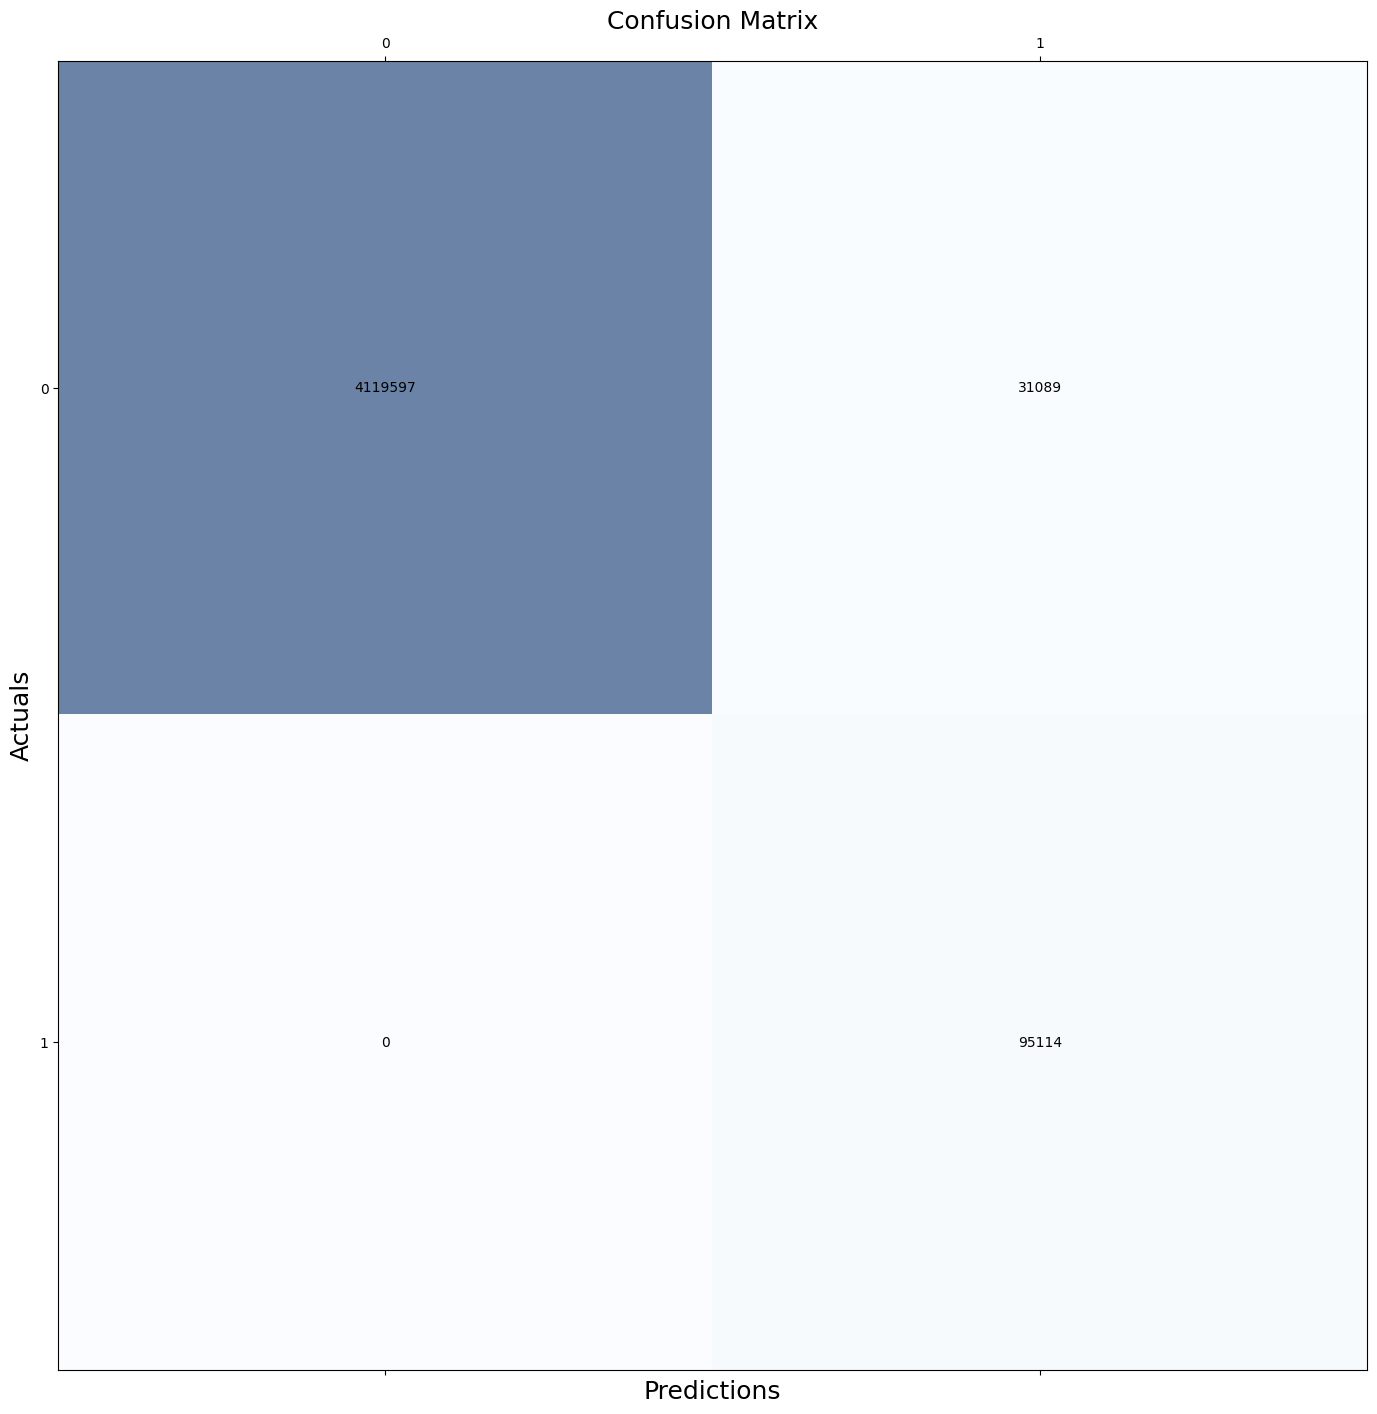

In [63]:
fig, ax = plt.subplots(figsize=(17, 17))
ax.matshow(conf_mat, cmap=plt.cm.Blues, alpha=0.6)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,s=conf_mat[i, j], va='center', ha='center')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()